# Uber Analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel("F:/Innomatics/Uber/uber_rides_data.xlsx")
df.head()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ride_id            200000 non-null  int64  
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 12.2+ MB


In [4]:
df.describe()

,ride_id,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967153,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


# Data Cleaning

In [5]:
# Convert pickup_datetime to datetime format and extract relevant components
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['pickup_datetime'].dt.day_name()
df['pickup_month'] = df['pickup_datetime'].dt.month

In [6]:
# Handle outliers: Remove entries with negative fares and unrealistic passenger counts
cleaned_data = df[(df['fare_amount'] > 0) & (df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]

# Remove outliers in geographic coordinates: assuming the rides are in NYC, we filter for reasonable lat/lon ranges
nyc_lon_min, nyc_lon_max = -74.05, -73.75
nyc_lat_min, nyc_lat_max = 40.63, 40.85
cleaned_data = cleaned_data[
    (cleaned_data['pickup_longitude'].between(nyc_lon_min, nyc_lon_max)) &
    (cleaned_data['pickup_latitude'].between(nyc_lat_min, nyc_lat_max)) &
    (cleaned_data['dropoff_longitude'].between(nyc_lon_min, nyc_lon_max)) &
    (cleaned_data['dropoff_latitude'].between(nyc_lat_min, nyc_lat_max))
]

# Display a summary of cleaned data
cleaned_data.describe()

,ride_id,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_month
count,1.928280e+05,192828.000000,192828.000000,192828.000000,192828.000000,192828.000000,192828.000000,192828.000000,192828.000000
mean,2.771255e+07,11.039133,-73.975706,40.750877,-73.974611,40.751016,1.689340,13.504475,6.283543
std,1.600994e+07,8.922390,0.033656,0.026330,0.032082,0.028579,1.305503,6.500504,3.440537
min,1.000000e+00,0.010000,-74.049495,40.630197,-74.049012,40.630055,1.000000,0.000000,1.000000
25%,1.382535e+07,6.000000,-73.992273,40.736551,-73.991570,40.735610,1.000000,9.000000,3.000000
50%,2.776268e+07,8.500000,-73.982133,40.753305,-73.980621,40.753732,1.000000,14.000000,6.000000
75%,4.154583e+07,12.500000,-73.968500,40.767465,-73.965876,40.768160,2.000000,19.000000,9.000000
max,5.542357e+07,499.000000,-73.753962,40.849964,-73.750620,40.849997,6.000000,23.000000,12.000000


# Visualization

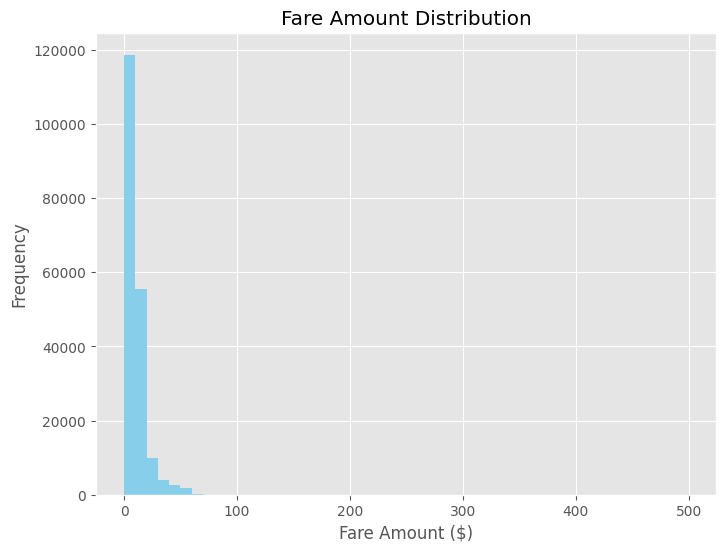

In [7]:
import matplotlib.pyplot as plt

# Set up the plotting style
plt.style.use('ggplot')

# 1. Fare Amount Distribution
plt.figure(figsize=(8, 6))
cleaned_data['fare_amount'].plot(kind='hist', bins=50, color='skyblue')
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()

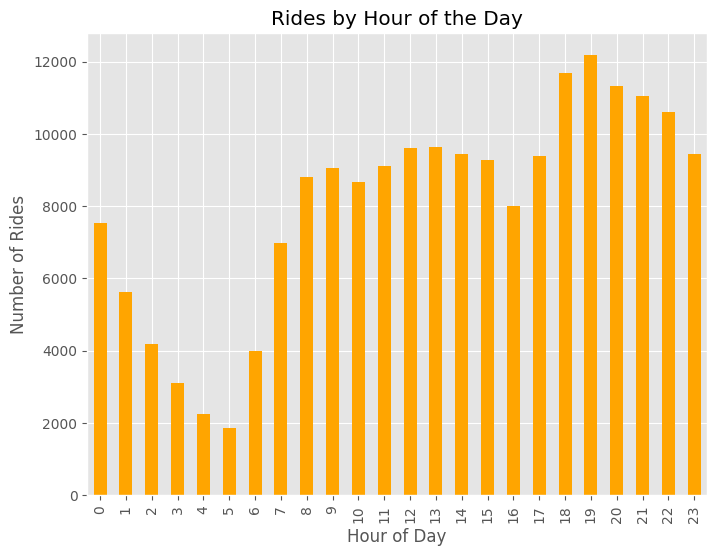

In [8]:
# 2. Number of Rides per Hour of the Day
plt.figure(figsize=(8, 6))
cleaned_data['pickup_hour'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Rides by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.show()

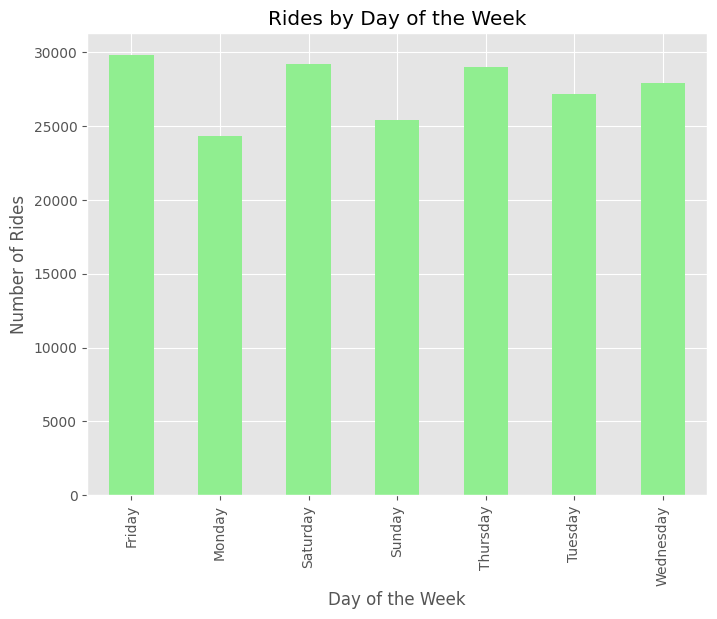

In [9]:
# 3. Number of Rides by Day of the Week
plt.figure(figsize=(8, 6))
cleaned_data['pickup_day_of_week'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.show()

C:\Users\payal\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


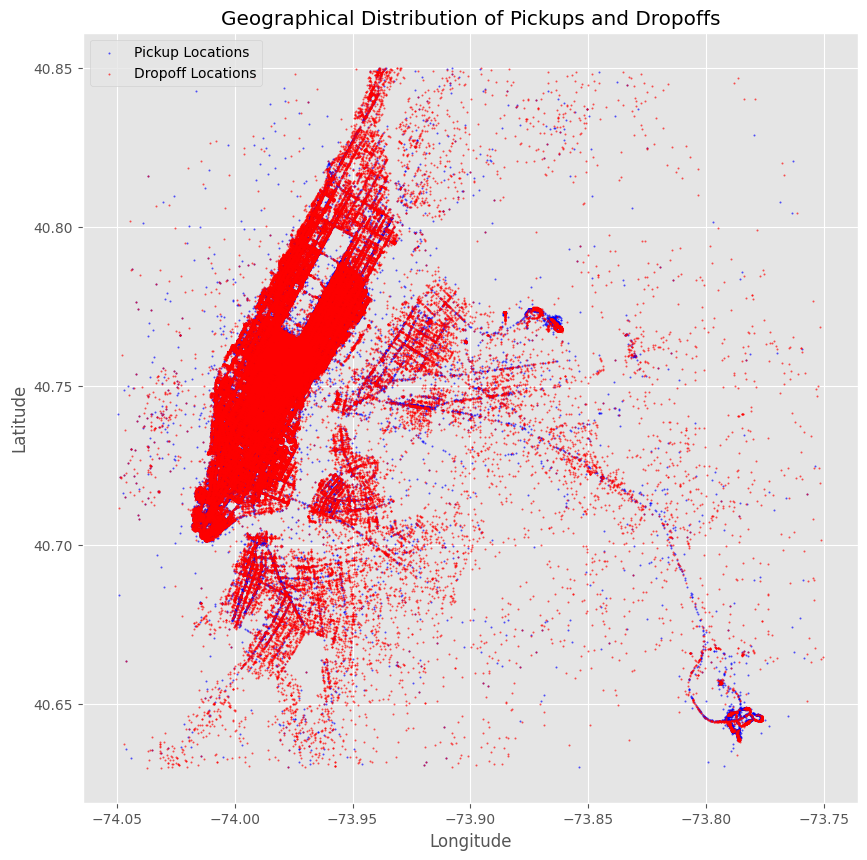

In [10]:
# 4. Pickup and Dropoff Location Patterns (Scatter plot for geographical distribution)
plt.figure(figsize=(10, 10))
plt.scatter(cleaned_data['pickup_longitude'], cleaned_data['pickup_latitude'], color='blue', alpha=0.5, s=1, label='Pickup Locations')
plt.scatter(cleaned_data['dropoff_longitude'], cleaned_data['dropoff_latitude'], color='red', alpha=0.5, s=1, label='Dropoff Locations')
plt.title('Geographical Distribution of Pickups and Dropoffs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

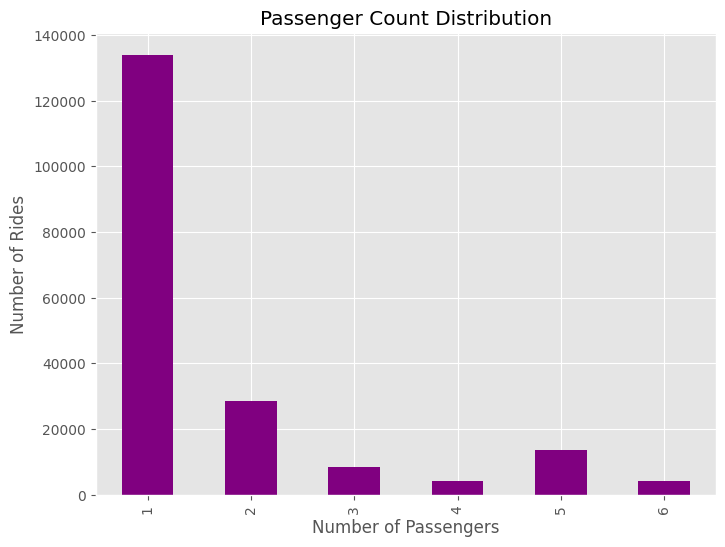

In [11]:
# 5. Passenger Count Distribution
plt.figure(figsize=(8, 6))
cleaned_data['passenger_count'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Passenger Count Distribution')
plt.xlabel('Number of Passengers')
plt.ylabel('Number of Rides')
plt.show()

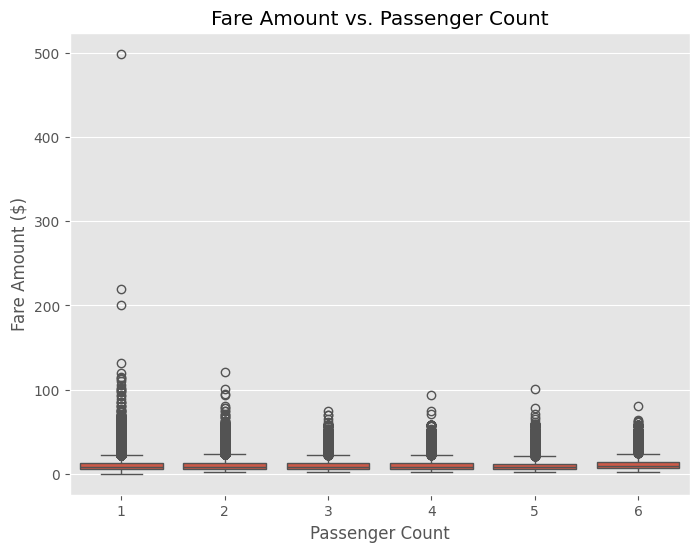

In [12]:
import seaborn as sns

# 6. Fare Amount vs. Passenger Count (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=cleaned_data)
plt.title('Fare Amount vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

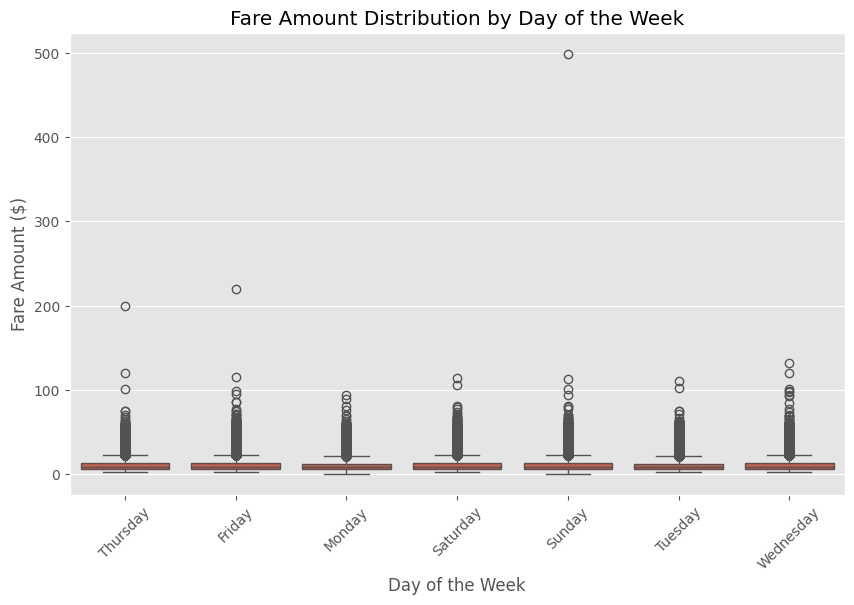

In [13]:
# 7. Fare Amount Distribution per Day of the Week (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='pickup_day_of_week', y='fare_amount', data=cleaned_data)
plt.title('Fare Amount Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Fare Amount ($)')
plt.xticks(rotation=45)
plt.show()

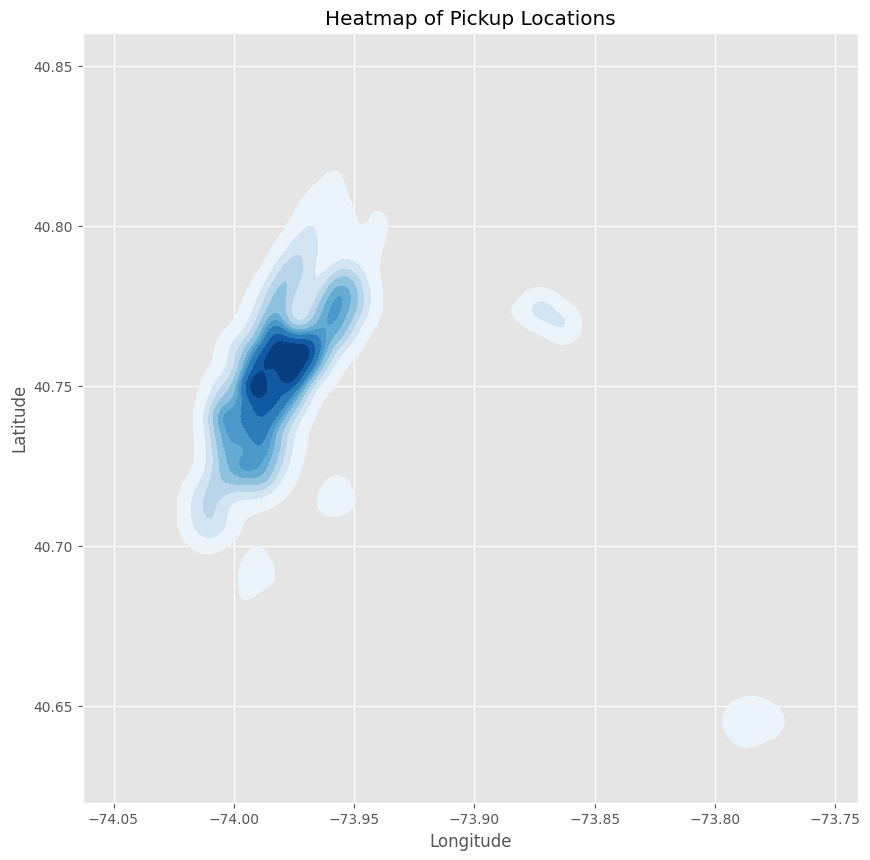

In [18]:
# 8. Heatmap of Pickup Locations
plt.figure(figsize=(10, 10))
sns.kdeplot(
    x=cleaned_data['pickup_longitude'], y=cleaned_data['pickup_latitude'],
    cmap='Blues', fill=True, thresh=0.05
)
plt.title('Heatmap of Pickup Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

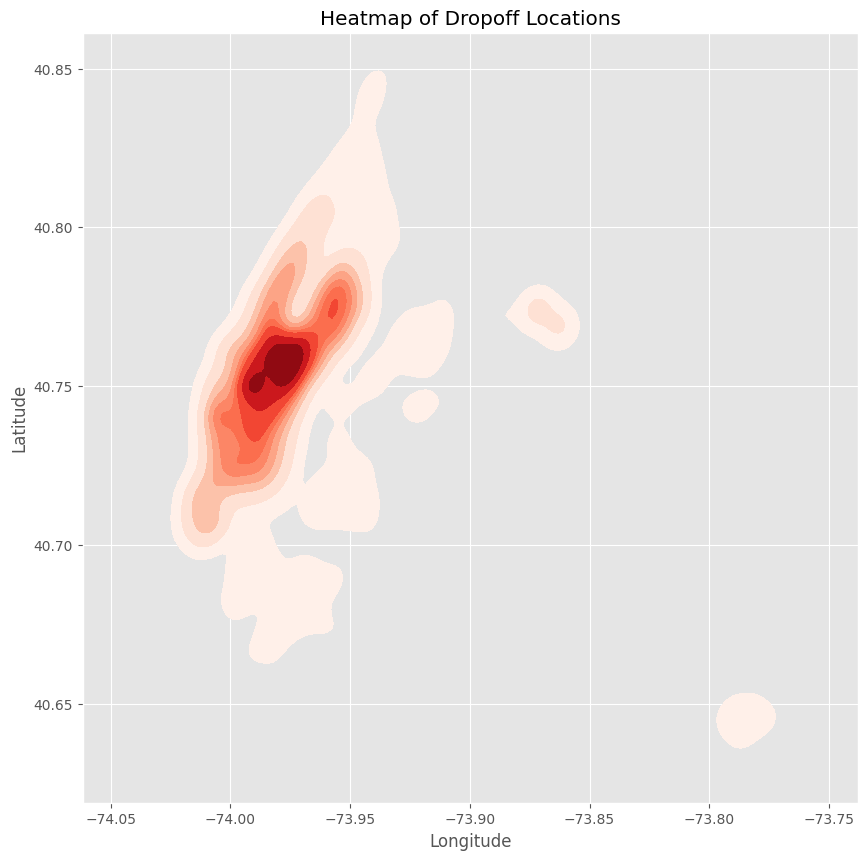

In [17]:
# 9. Heatmap of Dropoff Locations
plt.figure(figsize=(10, 10))
sns.kdeplot(
    x=cleaned_data['dropoff_longitude'], y=cleaned_data['dropoff_latitude'],
    cmap='Reds', fill=True, thresh=0.05
)
plt.title('Heatmap of Dropoff Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

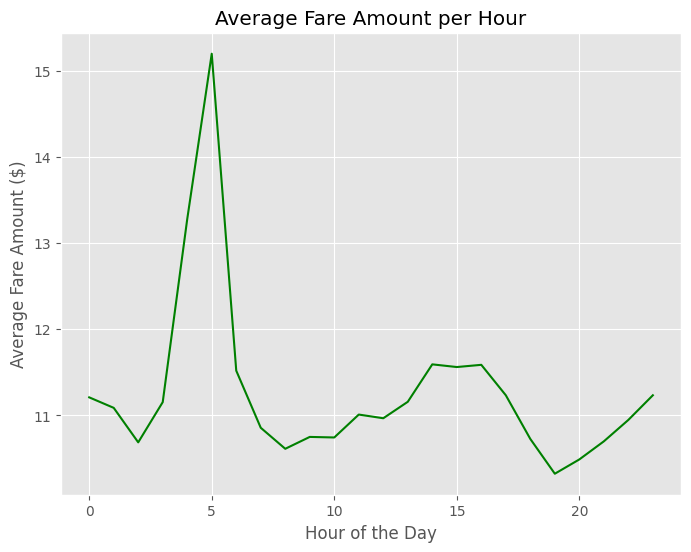

In [16]:
# 10. Average Fare Amount per Hour (Line plot)
plt.figure(figsize=(8, 6))
cleaned_data.groupby('pickup_hour')['fare_amount'].mean().plot(kind='line', color='green')
plt.title('Average Fare Amount per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare Amount ($)')
plt.show()

In [19]:
# 1. Calculate the average fare amount per hour
average_fare_by_hour = cleaned_data.groupby('pickup_hour')['fare_amount'].mean()

# 2. Calculate the total number of rides per hour
total_rides_by_hour = cleaned_data['pickup_hour'].value_counts().sort_index()

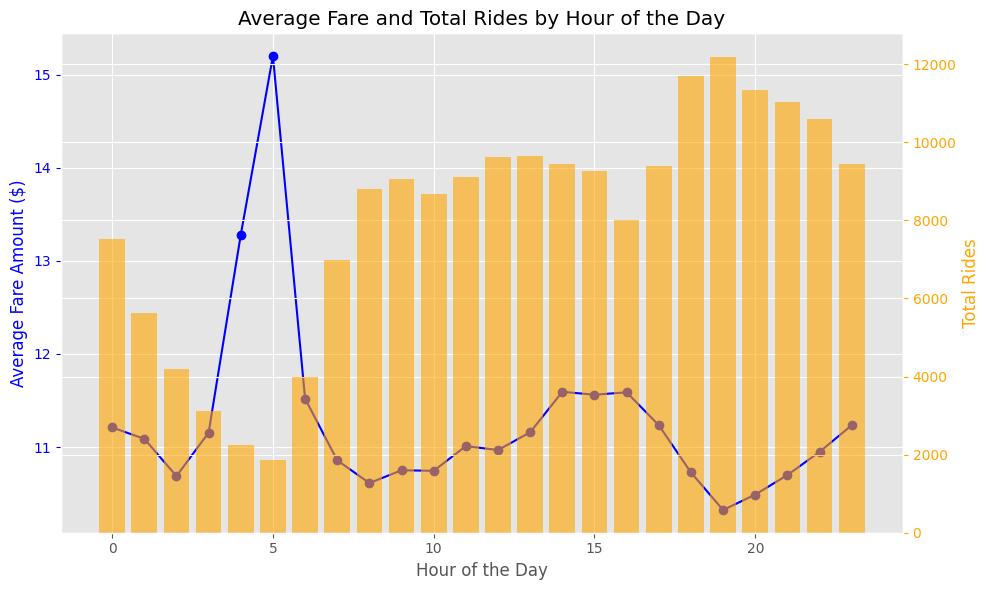

In [20]:
# Set up the figure with two plots side by side
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Average Fare per Hour
ax1.plot(average_fare_by_hour.index, average_fare_by_hour, color='b', label='Average Fare ($)', marker='o')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Average Fare Amount ($)', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis to plot the total rides per hour
ax2 = ax1.twinx()
ax2.bar(total_rides_by_hour.index, total_rides_by_hour, alpha=0.6, color='orange', label='Total Rides')
ax2.set_ylabel('Total Rides', color='orange')
ax2.tick_params('y', colors='orange')

# Add title and show plot
plt.title('Average Fare and Total Rides by Hour of the Day')
fig.tight_layout()
plt.show()

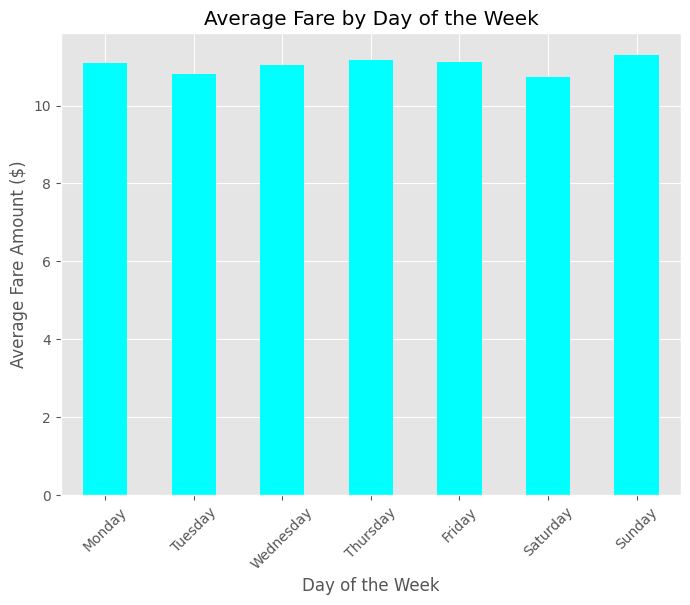

In [21]:
# Calculate the average fare amount for each day of the week
average_fare_by_weekday = cleaned_data.groupby('pickup_day_of_week')['fare_amount'].mean()

# Sort the days of the week for correct ordering
average_fare_by_weekday = average_fare_by_weekday.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting the average fare by day of the week
plt.figure(figsize=(8, 6))
average_fare_by_weekday.plot(kind='bar', color='cyan')
plt.title('Average Fare by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare Amount ($)')
plt.xticks(rotation=45)
plt.show()

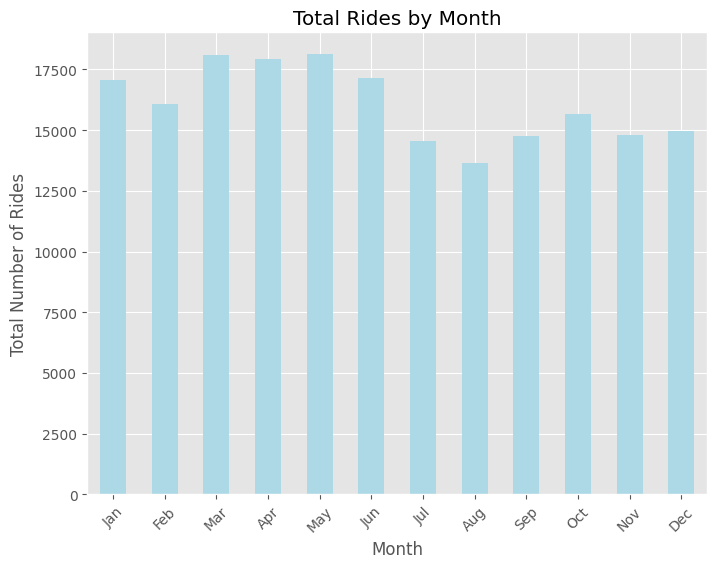

In [22]:
# Calculate the total number of rides for each month
total_rides_by_month = cleaned_data['pickup_month'].value_counts().sort_index()

# Plotting total rides by month
plt.figure(figsize=(8, 6))
total_rides_by_month.plot(kind='bar', color='lightblue')
plt.title('Total Rides by Month')
plt.xlabel('Month')
plt.ylabel('Total Number of Rides')
plt.xticks(ticks=range(0,12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


In [23]:
# Calculate the total number of rides for each day of the week
total_rides_by_weekday = cleaned_data['pickup_day_of_week'].value_counts()

# Sort the days of the week for correct ordering
total_rides_by_weekday = total_rides_by_weekday.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Display the busiest day of the week
busiest_day = total_rides_by_weekday.idxmax()
busiest_day_count = total_rides_by_weekday.max()

busiest_day, busiest_day_count

('Friday', 29800)

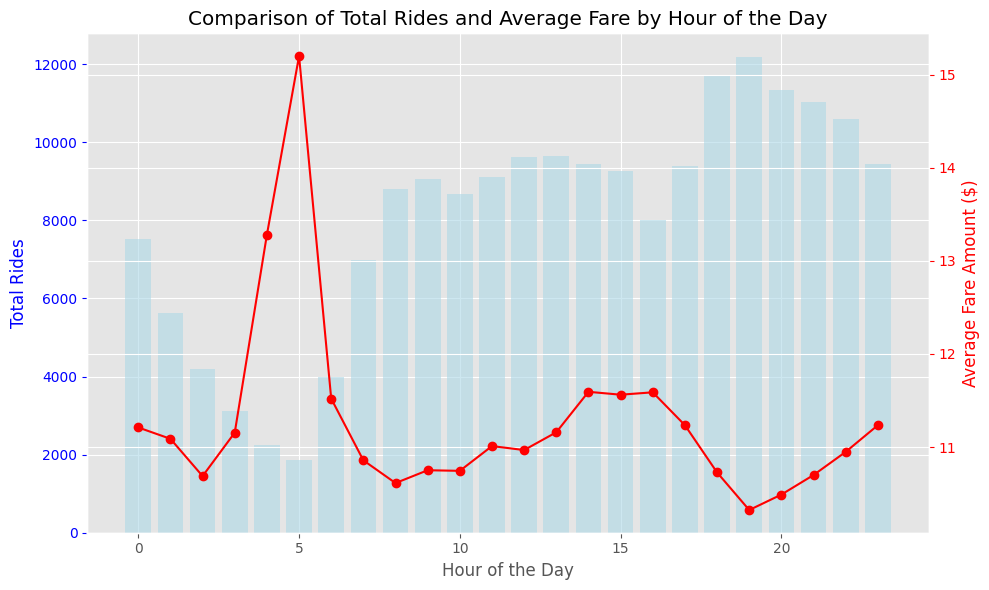

In [24]:
# Group by the hour of the day and calculate both total rides and average fare amount
rides_by_hour = cleaned_data['pickup_hour'].value_counts().sort_index()
average_fare_by_hour = cleaned_data.groupby('pickup_hour')['fare_amount'].mean()

# Set up the figure to display both metrics together
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Total Rides per Hour (Bar chart)
ax1.bar(rides_by_hour.index, rides_by_hour, color='lightblue', alpha=0.6, label='Total Rides')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Total Rides', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis to plot the average fare per hour
ax2 = ax1.twinx()
ax2.plot(average_fare_by_hour.index, average_fare_by_hour, color='red', marker='o', label='Average Fare ($)')
ax2.set_ylabel('Average Fare Amount ($)', color='red')
ax2.tick_params('y', colors='red')

# Add title and show plot
plt.title('Comparison of Total Rides and Average Fare by Hour of the Day')
fig.tight_layout()
plt.show()

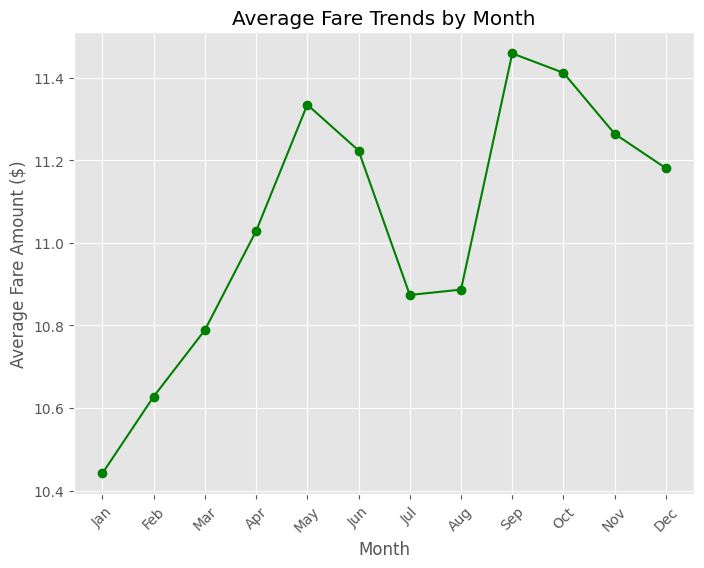

In [25]:
# Group by month and calculate the average fare for each month
monthly_fare_trends = cleaned_data.groupby('pickup_month')['fare_amount'].mean()

# Plotting the average fare trends by month
plt.figure(figsize=(8, 6))
monthly_fare_trends.plot(kind='line', marker='o', color='green')
plt.title('Average Fare Trends by Month')
plt.xlabel('Month')
plt.ylabel('Average Fare Amount ($)')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

# Question & Answers

# 1. What is the shape of given dataset?

In [26]:
df.shape

(200000, 11)

# 2. How many integer columns(by default) are given in the dataset?

In [28]:
integer_columns = df.select_dtypes(include='int64')
len(integer_columns.columns)

2

# 3. How many missing values exists in 'dropoff_longitude' column?

In [29]:
df['dropoff_longitude'].isnull().sum()

1

# 4. What is the data type of ' pickup_datetime' feature in your data?

In [31]:
df['pickup_datetime'].dtype

datetime64[ns, UTC]

# 5. Which of the following is the correct syntax to convert 'pickup_datetime' to datetime datatype?

In [32]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# 6. Which function can be used to remove null values from the dataframe?

In [34]:
df = df.dropna()

# 7. What is the average fare amount?
Remove the null values from the dataframe to answer the following question.

In [35]:
df['fare_amount'].mean()

11.359891549457748

# 8. Calculate distance between each pickup and dropoff points using Haversine formula. 
What is the median haversine distance between pickup and dropoff location according to the given dataset?

In [36]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    return R * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))

# Calculate haversine distance for each ride
df['haversine_distance'] = haversine(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])

# Get the median haversine distance
df['haversine_distance'].median()

2.120992396183407

# 9. What is the maximum haversine distance between pickup and dropoff location according to the given dataset?

In [37]:
df['haversine_distance'].max()

16409.239135313186

# 10. How many rides have 0.0 haversine distance between pickup and dropoff location according to the given dataset?

In [38]:
(df['haversine_distance'] == 0).sum()

5632

# 11. What is the mean 'fare_amount' for rides with 0 haversine distance?

In [39]:
df[df['haversine_distance'] == 0]['fare_amount'].mean()

11.585317826704546

# 12. What is the maximum 'fare_amount' for a ride?

In [40]:
df['fare_amount'].max()

499.0

# 13. What is the haversine distance between pickup and dropoff location for the costliest ride?

In [41]:
costliest_ride = df['fare_amount'].idxmax()
df.loc[costliest_ride, 'haversine_distance']

0.0007899213197627205

# 14. How many rides were recorded in the year 2014?

In [42]:
rides_2014 = df[df['pickup_datetime'].dt.year == 2014]
rides_2014.shape[0]

29968

# 15. How many rides were recorded in the first quarter of 2014?

In [43]:
rides_q1_2014 = rides_2014[rides_2014['pickup_datetime'].dt.month <= 3]
rides_q1_2014.shape[0]

7687

# 16. On which day of the week in September 2010, maximum rides were recorded ?

In [44]:
rides_september_2010 = df[(df['pickup_datetime'].dt.year == 2010) & (df['pickup_datetime'].dt.month == 9)]

rides_september_2010['pickup_datetime'].dt.day_name().value_counts().idxmax()


'Thursday'

# 17. Apply a Machine Learning Algorithm to predict the fare amount given following input features:
Which algorithm gives the least adjusted R square value?

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Select features and target variable
X = data[['passenger_count', 'haversine_distance', 'pickup_day_of_week']]
y = data['fare_amount']

# Convert categorical 'pickup_day_of_week' to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['pickup_day_of_week'])

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

# Fit and evaluate each model
models = {'Linear Regression': lr, 'Decision Tree': dt, 'Random Forest': rf}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: R^2 Score = {r2}')

ModuleNotFoundError: No module named 'sklearn'